In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.arange(1,11) * (100 + np.random.randn(10))
y = 2 * x + np.random.randn(10)*5
X = np.vstack((x,y))
print(X)

[[ 101.09626521  201.14855103  303.32860654  396.34365396  501.27264571
   604.74892626  706.06376974  795.46986499  901.0641058  1010.76383233]
 [ 202.9910078   401.0986803   611.81753556  799.20628216 1009.20387197
  1206.73110749 1404.77627341 1592.51194696 1802.67081823 2009.9175768 ]]


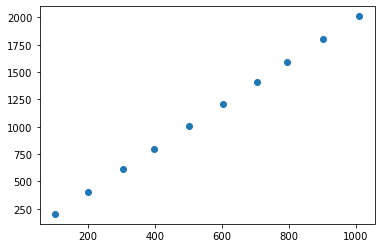

In [3]:
plt.scatter(X[0], X[1])
plt.show()

In [4]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
print(Xcentered)
print("Mean vector: ", m)

(array([-451.03375695, -350.98147113, -248.80141562, -155.7863682 ,
        -50.85737644,   52.6189041 ,  153.93374758,  243.33984283,
        348.93408365,  458.63381017]), array([-901.10150227, -702.99382977, -492.27497451, -304.88622791,
        -94.88863809,  102.63859742,  300.68376334,  488.4194369 ,
        698.57830816,  905.82506673]))
Mean vector:  (552.1300221555048, 1104.0925100679638)


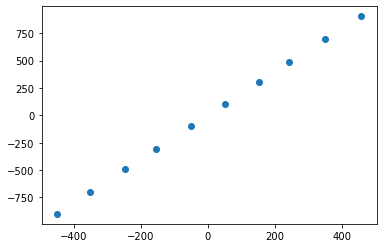

In [5]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.show()

In [6]:
X.T.shape

(10, 2)

In [7]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 92572.89400399 184189.38021981]
 [184189.38021981 366500.89066006]] 

Variance of X:  92572.89400399175
Variance of Y:  366500.89066006016
Covariance X and Y:  184189.38021981475


In [8]:
covmat

array([[ 92572.89400399, 184189.38021981],
       [184189.38021981, 366500.89066006]])

In [9]:
_, vecs = np.linalg.eig(covmat)
v = vecs[:,1]
Xnew = np.dot(v, Xcentered)
print(Xnew)

[ 1007.67687705   785.73787987   551.5752275    342.37373169
   107.62112851  -115.33678497  -337.78688216  -545.67776384
  -780.87320249 -1015.31021116]


In [10]:
v, v.shape

(array([-0.44904886, -0.8935072 ]), (2,))

In [11]:
Xcentered

(array([-451.03375695, -350.98147113, -248.80141562, -155.7863682 ,
         -50.85737644,   52.6189041 ,  153.93374758,  243.33984283,
         348.93408365,  458.63381017]),
 array([-901.10150227, -702.99382977, -492.27497451, -304.88622791,
         -94.88863809,  102.63859742,  300.68376334,  488.4194369 ,
         698.57830816,  905.82506673]))

In [12]:
m

(552.1300221555048, 1104.0925100679638)

In [13]:
n = 8     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [ 902.78024426 1801.80834055]
Original:  [ 901.0641058  1802.67081823]


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(X))

In [15]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(xn, '-', x_pca[0], '=', np.abs(xn - x_pca[0]))

1007.6768770480448 - -1007.6768770480447 = 2015.3537540960897
785.7378798653925 - -785.7378798653925 = 1571.475759730785
551.575227500419 - -551.5752275004189 = 1103.150455000838
342.37373169337104 - -342.37373169337104 = 684.7474633867421
107.62112851145345 - -107.62112851145343 = 215.24225702290687
-115.33678497427289 - 115.33678497427286 = 230.67356994854575
-337.78688216025864 - 337.7868821602586 = 675.5737643205173
-545.6777638362669 - 545.6777638362666 = 1091.3555276725335
-780.8732024882659 - 780.8732024882657 = 1561.7464049765317
-1015.3102111596169 - 1015.3102111596169 = 2030.6204223192337


In [16]:
p = PCA(n_components=0.99)


In [17]:
p.fit_transform(np.transpose(X))

array([[-1007.67687705],
       [ -785.73787987],
       [ -551.5752275 ],
       [ -342.37373169],
       [ -107.62112851],
       [  115.33678497],
       [  337.78688216],
       [  545.67776384],
       [  780.87320249],
       [ 1015.31021116]])

In [18]:
from sklearn import datasets as dts

In [19]:
data = dts.load_diabetes()

In [20]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [21]:
import pandas as pd

In [22]:
data.data.shape

(442, 10)

In [23]:
target = data.target

In [24]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [26]:
p1 = PCA(n_components=0.95)
p2 = PCA(n_components=0.5)

In [27]:
dp1 = p1.fit_transform(df)

In [28]:
dp2 = p2.fit_transform(df)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


In [35]:
dp1_d = train_test_split(dp1,target, test_size=0.2)
dp2_d = train_test_split(dp2,target, test_size=0.2)
df_x_d = train_test_split(df,target, test_size=0.2)

In [36]:
reg = LinearRegression()

for x_tr, x_ts, y_tr, y_ts in [dp1_d, dp2_d, df_x_d]:
    
    reg.fit(x_tr, y_tr)
    print(f'{reg.score(x_ts,y_ts)}')

0.6080957559932938
0.33151450035300334
0.3984606747780173


In [37]:
p1.explained_variance_

array([0.0091252 , 0.00338394, 0.00273461, 0.00216661, 0.00150155,
       0.00136671, 0.00121669, 0.00098341])

In [38]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor as ABR

In [39]:
X = dts.load_boston()['data']
y = dts.load_boston()['target']
res = []

for d in [x for x in range(1,11)]:
    X2 = PCA(n_components=d).fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)
    model = RFR().fit(x_train, y_train)
    print(f'var = {d}, score = {model.score(x_test, y_test)}')
    res.append(model.score(x_test, y_test))

var = 1, score = 0.015094712446367176
var = 2, score = 0.26546371393689383
var = 3, score = 0.3241179457552079
var = 4, score = 0.4069663108644135
var = 5, score = 0.5956558313184679
var = 6, score = 0.6197837217968627
var = 7, score = 0.7242354685463026
var = 8, score = 0.7357387392252137
var = 9, score = 0.680783647909564
var = 10, score = 0.7629968622389375


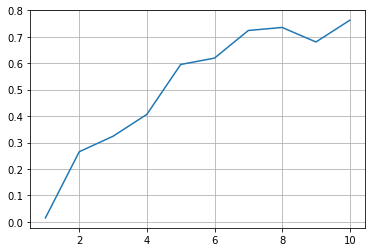

In [40]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(1,11)], res)
plt.grid()